# _Code Session_ 4: Raízes de Equações

## `fsolve`

A função `fsolve` do submódulo `scipy.optimize` pode ser usada como método geral para busca de raízes de equações não-lineares escalares ou vetoriais. 

Para usar `fsolve` em uma equação escalar, precisamos de, no mínimo:

- uma função que possui pelo menos um argumento
- estimativa inicial para a raiz

Para equações vetoriais (sistemas), precisamos de mais argumentos. Vejamos o exemplo do paraquedista:

In [1]:
import numpy as np, matplotlib.pyplot as plt 
from scipy.optimize import fsolve 

t = 12.0
v = 42.0
m = 70.0
g = 9.81

def param(t,v,m,g):    
    return [t,v,m,g]

def fun(c):
    p = param(t,v,m,g)
    return p[3]*p[2]/c*(1 - np.exp(-c/p[2]*p[0])) - p[1]

# estimativa inicial 
c0 = -1000.0

# raiz 
c_raiz = fsolve(fun,c0)

# impressao (estilo Python 2)
print('Minha raiz é %.6f' % c_raiz)

# impressao (estilo Python 3)
print("Minha raiz é {0:.6f}".format(c_raiz[0]))

Minha raiz é 15.127432
Minha raiz é 15.127432


### Como incorporar tudo em uma só função 

In [2]:
def minha_fun(t,v,m,g,c0):
    
    p = [t,v,m,g] 
    f = lambda c: p[3]*p[2]/c*(1 - np.exp(-c/p[2]*p[0])) - p[1]
    c_raiz = fsolve(f,c0)
    print("---> Minha raiz é {0:.6f}".format(c_raiz[0]))
    return f,c_raiz

In [3]:
fc,c_raiz = minha_fun(t,v,m,g,c0)

---> Minha raiz é 15.127432


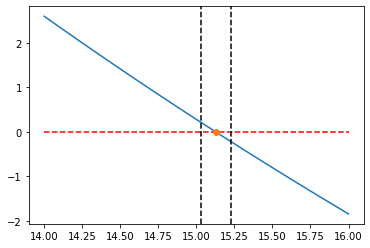

In [4]:
a,b = 14,16
c = np.linspace(a,b,100)

delta = 0.1
plt.plot(c,fc(c),c,0*c,'r--',c_raiz,fc(c_raiz),'o');
plt.axvline(c_raiz - delta,c='k',ls='--');
plt.axvline(c_raiz + delta,c='k',ls='--');

### Problema 1

Resolva o sistema não-linear abaixo:

$$\begin{cases}
x^2 + y^2 = 2 \\
x^2 - y^2 = 1
\end{cases}$$

#### Resolução

Primeiramente, vamos plotar as curvas de nível 0 das funções que compõem o sistema. Faremos isto usando uma _grade numérica_ e a função `contour`. 

##### Criando uma grade numérica bidimensional uniforme

Uma _grade numérica_ é um conjunto de pontos separados por uma distância uniforme (ou variável). Neste caso em particular, criaremos uma _grade numérica_ bidimensional. Podemos fazer isto da seguinte forma:

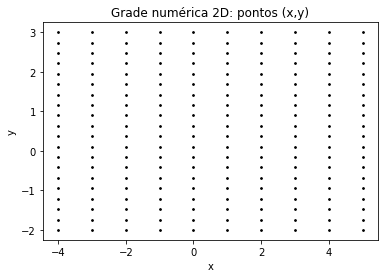

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# limites do domínio:
# região do plano [a,b] x [c,d]
a, b = -4.0, 5.0
c, d = -2.0, 3.0

# no. de pontos em cada direção
nx, ny = 10, 20 

# distribuição dos pontos
x = np.linspace(a,b,nx)
y = np.linspace(c,d,ny)

# grade numérica 2D
[X,Y] = np.meshgrid(x,y)

# plotando pontos da grade numérica
plt.scatter(X,Y,s=3,c='k');
plt.title('Grade numérica 2D: pontos (x,y)')
plt.xlabel('x'); plt.ylabel('y');

##### Plotando curvas de nível

Plotaremos as curvas de nível 0 das funções não-lineares para realizar a análise gráfica e localizar as raízes para então escolhermos um vetor de estimativa inicial.

Para plotar curvas de nível das funções sobre a grade numérica anterior, fazemos o seguinte:

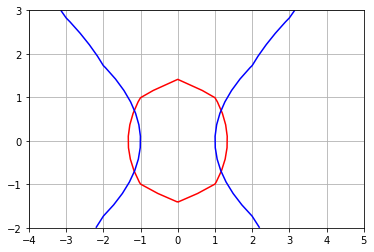

In [6]:
# funções definidas sobre a grade 2D
F = X**2 + Y**2 - 2
G = X**2 - Y**2 - 1

# contorno de nível 0
plt.contour(X,Y,F,colors='red',levels=0);
plt.contour(X,Y,G,colors='blue',levels=0);
plt.grid()

Por que a figura está meio "tosca"? Porque temos poucos pontos na grade. Vamos aumentar o número de pontos. Este processo é conhecido como _refinamento de malha_.

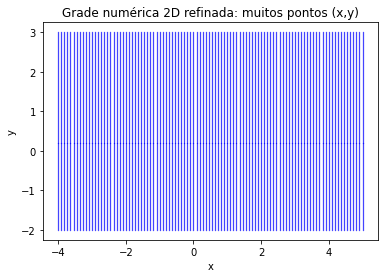

In [7]:
# refinando a malha numérica
nx2, ny2 = 100, 200

# redistribuição dos pontos
x2 = np.linspace(a,b,nx2)
y2 = np.linspace(c,d,ny2)

# grade numérica 2D refinada
[X2,Y2] = np.meshgrid(x2,y2)

# plotando pontos da grade numérica
plt.scatter(X2,Y2,s=0.1,c='b');
plt.title('Grade numérica 2D refinada: muitos pontos (x,y)')
plt.xlabel('x'); plt.ylabel('y');

Vamos plotar novamente as curvas de nível das funções sobre a grade numérica refinada.

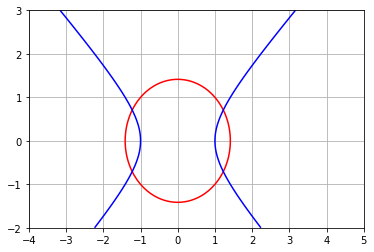

In [8]:
# funções definidas sobre a grade 2D refinada
F2 = X2**2 + Y2**2 - 2
G2 = X2**2 - Y2**2 - 1

# contorno de nível 0 na malha refinada
plt.contour(X2,Y2,F2,colors='red',levels=0);
plt.contour(X2,Y2,G2,colors='blue',levels=0);
plt.grid()

##### Estimativa inicial

A partir do gráfico anterior, vemos que há 4 raízes possíveis para o sistema não-linear. Vamos escolher uma delas para aproximar. Por conveniência, escolhamos a que se encontra no primeiro quadrante.

Vamos fazer uma plotagem localizada no primeiro quadrante:

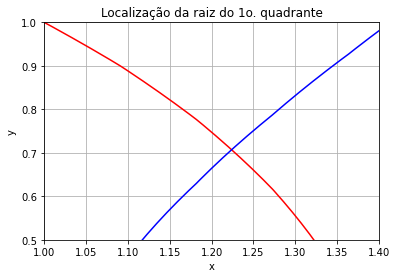

In [9]:
# contorno de nível 0 na malha refinada
plt.contour(X2,Y2,F2,colors='red',levels=0);
plt.contour(X2,Y2,G2,colors='blue',levels=0);
plt.xlim([1.0,1.4])
plt.ylim([0.5,1.0])
plt.xlabel('x'); plt.ylabel('y'); plt.grid()
plt.title('Localização da raiz do 1o. quadrante');

Observando o gráfico, faremos a escolha do ponto $(x_0,y_0) = (1.2,0.7)$ como estimativa inicial.

##### Resolução do sistema não-linear

Para resolver o sistema não-linear, primeiro definimos uma função que retornará uma tupla contendo cada função do sistema em cada uma de suas coordenadas.

In [10]:
# função que returna uma lista com as funções do sistema
def F(vars):
    x,y = vars # cria x,y como variáveis locais
    f = x**2 + y**2 - 2 # f(x,y) = 0
    g = x**2 - y**2 - 1 # g(x,y) = 0
    return [f,g]

Em seguida, usamos a função `fsolve` passando o vetor inicial escolhido, isto é, $(x_0,y_0) = (1.2,0.7)$, para determinar a solução aproximada $(x_1,y_1)$.

In [11]:
from scipy.optimize import fsolve

xr, yr = fsolve(F,(1.2,0.7))
print(f'A solução aproximada é o vetor (xr,yr) = ({xr:.3f},{yr:.3f})')

A solução aproximada é o vetor (xr,yr) = (1.225,0.707)


##### Verificação e plotagem

Podemos verificar que $x_r$ e $y_r$ satisfazem às equações dentro de uma certa precisão:

In [79]:
xr**2 + yr**2 - 2

3.956968086527013e-11

In [80]:
xr**2 - yr**2 - 1

-6.642031369352708e-11

Isto mostra que os valores estão muito próximos de zero.

Finalmente, podemos plotar as curvas de nível destacando a solução obtida.

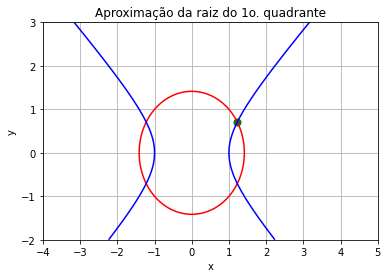

In [81]:
# contorno de nível 0 na malha refinada
plt.contour(X2,Y2,F2,colors='red',levels=0);
plt.contour(X2,Y2,G2,colors='blue',levels=0);
plt.xlabel('x'); plt.ylabel('y'); plt.grid()
plt.title('Aproximação da raiz do 1o. quadrante');
plt.scatter(xr,yr,c='green',s=50);